快速可视化机器学习：    

提供了各类显示对象:
- `ConfusionMatrixDisplay`
- `inspection.DecisionBoundaryDisplay ` 决策边界可视化

提供了接受数据的方法：     
- `from_estimator` 提供 fit后的模型、X
-  `from_predictions` 提供 `y_real, y_pred`
1. `from_estimator`
   - `response_method`: 目标值， 比如分类和预测

# 决策边界

## 示例1： 逻辑回归的决策边界

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

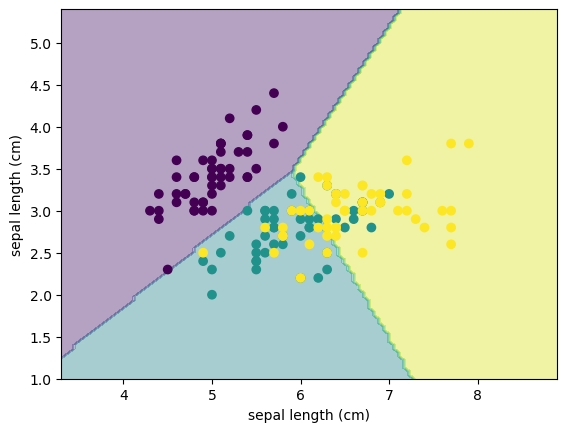

In [15]:
iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
bounddis = DecisionBoundaryDisplay.from_estimator(
    estimator=classifier,
    X=X,
    alpha = 0.4,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[0],
)
bounddis.ax_.scatter(X[:, 0], X[:, 1], c = iris.target)

## plot_method参数: 对应plt几种图
- contourf: 平滑填充分类区域
- contour: 只画边界线
- pcolormesh: 比contourf更加粗糙，但快点

In [7]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [8]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=0
)
clf = LinearDiscriminantAnalysis().fit(X, y)

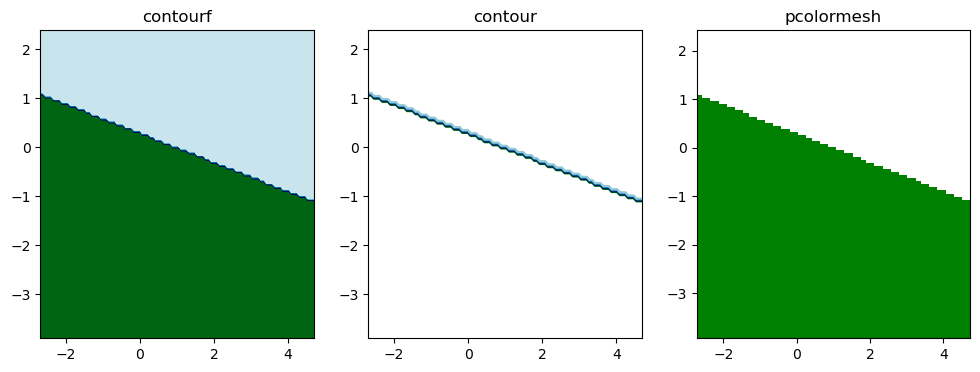

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
methods = ['contourf', 'contour', 'pcolormesh']
for ax, method in zip(axes, methods):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method='predict',
        plot_method=method,
        ax = ax,
        cmap = 'ocean'
    )
    ax.set_title(method)

## response_method参数：如何衡量到决策边界的距离？
绘制决策边界：每个点属于哪个类？有多远
- `decision_function`: 距离测量仪， 边界是距离=0的线，距离分正负
- `predict_proba`: 概率仪，边界是概率=0.5的线，概率0~1
- `predict`: 投票结果，没有边界，就是明确的离散块

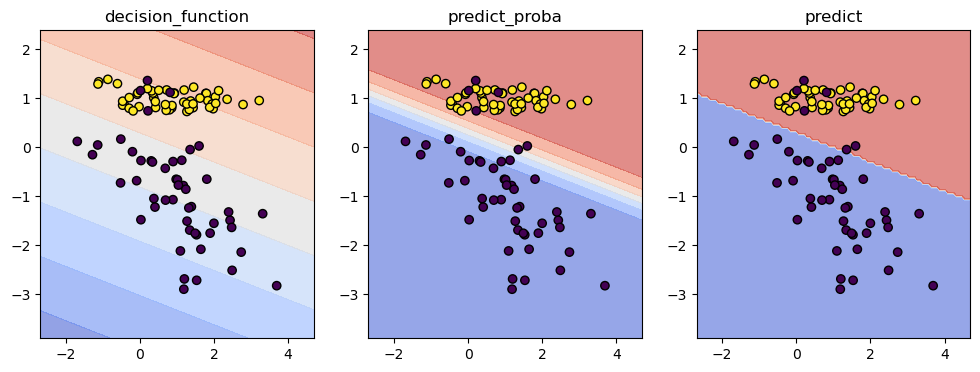

In [11]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=0)
clf = LinearDiscriminantAnalysis().fit(X, y)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
methods = ['decision_function', 'predict_proba', 'predict']

for ax, method in zip(axes, methods):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method=method, plot_method='contourf',
        ax=ax, cmap='coolwarm', alpha=0.6
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    ax.set_title(method)
plt.show()

levels参数： 控制绘制几个层级
- 二分类, $f(x) = 0$ 分界面，`levels=[0]`即决策边界线。 如果svm， `levels=[-1, 0, 1]` 3条间隔线
- 概率值：`levels=[0.2, 0.5, 0.8]` 即在这些输出概率值绘制
- 连续值

示例

In [34]:
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

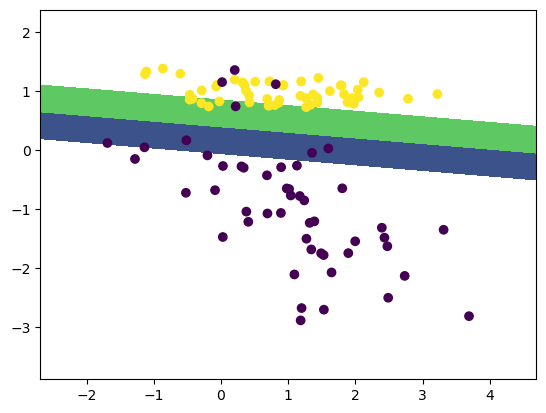

In [12]:
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=0
)
clf = svm.SVC(kernel='linear').fit(X, y)
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method='decision_function',
    levels = [-1, 0, 1], # 结合response method 表示距离
    ax = ax
)
ax.scatter(X[:, 0], X[:, 1], c=y)

In [13]:
clf.predict(X) # svc预测结果为 0，1二分类

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

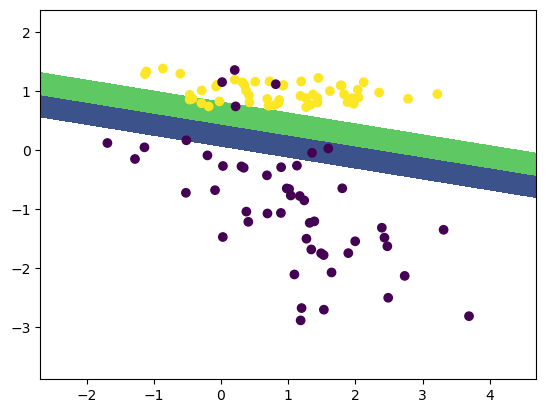

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y)
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf, 
    X,
    response_method='predict_proba',
    levels = [0.25, 0.5, 0.75],
    ax = ax
)
ax.scatter(X[:, 0], X[:, 1], c=y)

In [23]:
clf.predict(X) # ??????

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

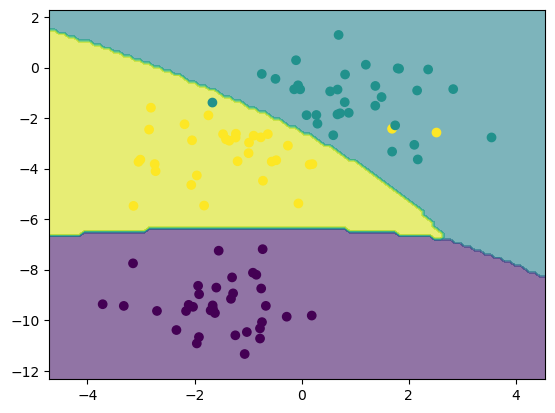

In [33]:
from sklearn.datasets import make_blobs
from sklearn import svm
X, y = make_blobs(centers=3, random_state=2, n_features=2)
clf = svm.SVC(kernel='rbf', probability=True).fit(X, y)
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method='predict',
    ax = ax,
    alpha = 0.6
)
ax.scatter(X[:, 0], X[:, 1], c=y)
